In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("myntra_data.csv")
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


# Data Cleaning
1. Check duplicate rows and remove them and reset index after removing them.
2. Check null values and remove them.
3. Drop extra columns which are not useful for analysis.
4. Add new column product id using information from product link.
5. Remove common rows having same product id (since there is not much difference except other row has one extra rating count)

In [4]:
df.shape

(168029, 13)

In [5]:
df = df.drop_duplicates().reset_index()

In [6]:
df.shape

(146611, 14)

In [7]:
df.isnull().sum()

index               0
product_name        0
brand_name          0
rating              0
rating_count        0
marked_price        0
discounted_price    0
sizes               0
product_link        0
img_link            0
product_tag         0
brand_tag           0
discount_amount     0
discount_percent    0
dtype: int64

There is no null values in the given data. 

In [8]:
df.describe()

,index,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
count,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000
mean,85576.100115,2.317154,123.589219,2525.860379,1532.622675,993.237704,37.147765
std,48874.743753,2.097438,817.995615,2437.720930,1842.427134,1235.525991,24.594289
min,0.000000,0.000000,0.000000,50.000000,49.000000,0.000000,0.000000
25%,43864.500000,0.000000,0.000000,1299.000000,679.000000,210.000000,15.000000
50%,87959.000000,3.600000,6.000000,1999.000000,1012.000000,702.000000,40.000000
75%,127645.500000,4.300000,34.000000,2999.000000,1749.000000,1317.000000,59.000000
max,167991.000000,5.000000,55900.000000,113999.000000,45900.000000,68400.000000,91.000000


In [9]:
df = df.drop(["img_link", "brand_tag", "index"], axis = 1)

In [10]:
df.shape

(146611, 11)

In [11]:
df["product_link"] = df["product_link"].str.split("/")

In [12]:
df["product_link"][0]

['wallets',
 'lino-perros',
 'lino-perros-women-peach-coloured-croc-textured-two-fold-wallet',
 '18070682',
 'buy']

In [13]:
list = [df["product_link"][i][3] for i in range(len(df["product_link"]))]

In [14]:
product = pd.Series(list)
df["Product_id"]= product.values

In [15]:
df =df.loc[:,["Product_id","product_name","brand_name","rating","rating_count","marked_price","discounted_price","discount_amount","discount_percent","sizes","product_link","product_tag"]]

In [16]:
df = df.drop("product_link", axis = 1)

In [17]:
df.value_counts("Product_id")

Product_id
10347227    2
14036012    2
15342644    2
18008078    2
14984314    2
           ..
15609358    1
15609340    1
15609328    1
15609308    1
9996453     1
Length: 146435, dtype: int64

In [18]:
df[df["Product_id"]=="14984314"]

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag
22661,14984314,Boys Pack Of 5 Joggers,LilPicks,4.3,51,2699,1619,1080,40,"2-3Y,3-4Y,4-5Y,5-6Y,6-7Y",track-pants
30699,14984314,Boys Pack Of 5 Joggers,LilPicks,4.3,52,2699,1619,1080,40,"2-3Y,3-4Y,4-5Y,5-6Y,6-7Y",track-pants


In [19]:
df.shape

(146611, 11)

In [20]:
df = df.drop_duplicates("Product_id")

In [21]:
df.shape

(146435, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146435 entries, 0 to 146610
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product_id        146435 non-null  object 
 1   product_name      146435 non-null  object 
 2   brand_name        146435 non-null  object 
 3   rating            146435 non-null  float64
 4   rating_count      146435 non-null  int64  
 5   marked_price      146435 non-null  int64  
 6   discounted_price  146435 non-null  int64  
 7   discount_amount   146435 non-null  int64  
 8   discount_percent  146435 non-null  int64  
 9   sizes             146435 non-null  object 
 10  product_tag       146435 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 13.4+ MB


# Univariate Analysis

In [23]:
df.head(2)

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,467,36,Onesize,wallets
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,715,55,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops


In [24]:
df.nunique()

Product_id          146435
product_name         46012
brand_name            3194
rating                  42
rating_count          1201
marked_price          3219
discounted_price      4539
discount_amount       4290
discount_percent        92
sizes                 2938
product_tag            341
dtype: int64

Product_name, brand_name, sizes and product_tag are categorical columns and remaining ones are numerical.

In [25]:
df["product_name"].value_counts()

Slim Fit Casual Shirt                               1844
Men Slim Fit Jeans                                  1293
Men Running Shoes                                   1047
Women Open Toe Flats                                 897
Men Slim Fit Casual Shirt                            831
                                                    ... 
Floral Front Slit Midi Dress                           1
Floral Leather Structured Sling Bag                    1
Women Cotton Culottes Trousers                         1
Pack Of 2 Striped Pure Cotton 210 GSM Bath Towel       1
Solid Twill Seat Cushion                               1
Name: product_name, Length: 46012, dtype: int64

In [26]:
df_tag = df["product_tag"].value_counts().to_frame().reset_index().rename(columns = {"index":"product_tag", "product_tag":"count"})

<AxesSubplot: xlabel='product_tag'>

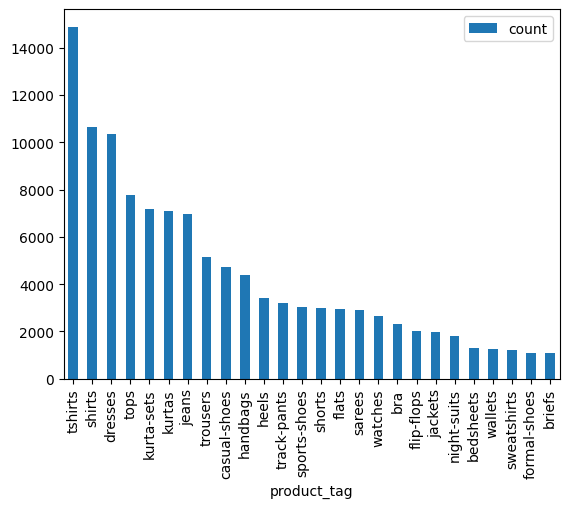

In [27]:
df_tag[df_tag["count"]>1000].plot(kind = "bar", x = "product_tag")

In [28]:
df["sizes"].value_counts()

Onesize                                                                                20619
S,M,L,XL,XXL                                                                           15329
XS,S,M,L,XL                                                                            11102
S,M,L,XL                                                                               10726
XS,S,M,L,XL,XXL                                                                         8794
                                                                                       ...  
UK5,UK5.5,UK6.5,UK7                                                                        1
32A,32B,32C,32D,32DD,34A,34B,34C,34D,34DD,36A,36B,36C,36D,36DD,38A,38B,38C,38D,38DD        1
1Y,18M,2Y,4Y,6Y,8Y                                                                         1
28/30,29/30,30/30,31/32,32/32,33/32,34/32,34/34,36/34,38/34                                1
27.5,29,30,32                                                         

In [29]:
df.head(2)

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,467,36,Onesize,wallets
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,715,55,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops


C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\3881989854.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["rating"])


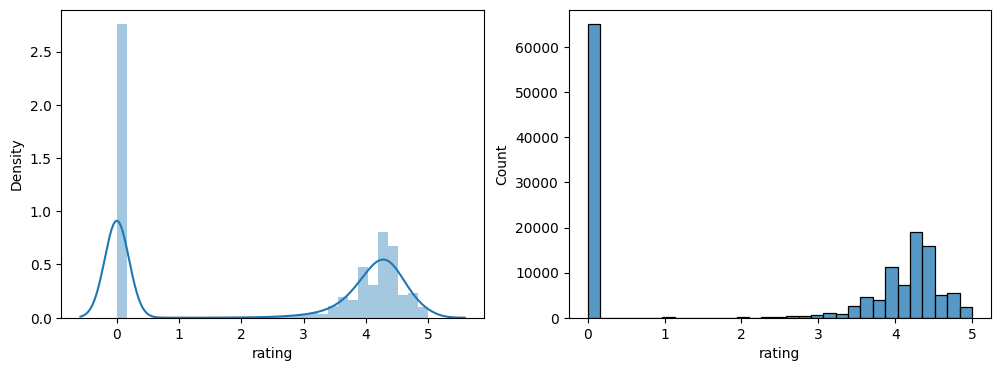

In [30]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(df["rating"])
plt.subplot(1,2,2)
sns.histplot(df["rating"])
plt.show()

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\2472749138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["rating"]!=0]["rating"])


<AxesSubplot: xlabel='rating', ylabel='Density'>

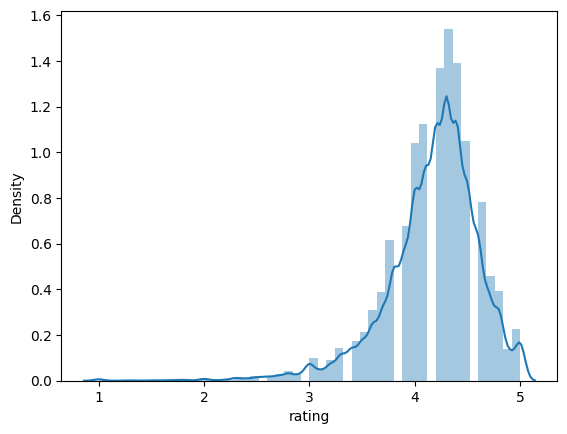

In [31]:
sns.distplot(df[df["rating"]!=0]["rating"])

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\231352132.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["marked_price"])
C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\231352132.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["discount_amount"])


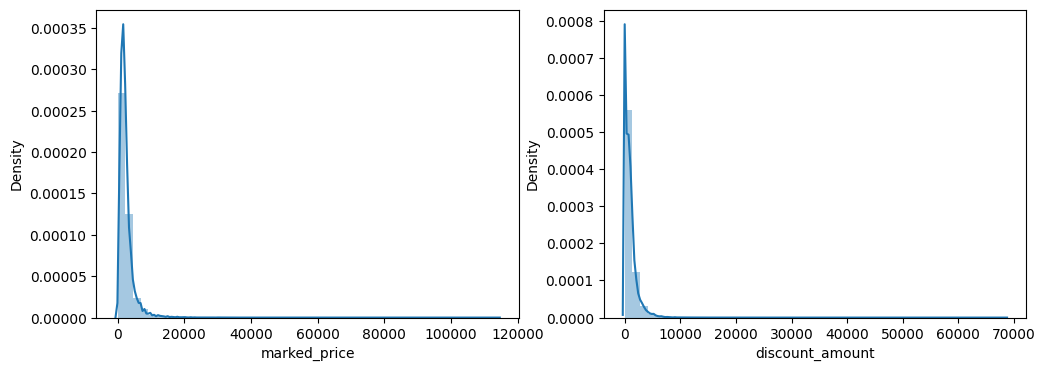

In [32]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(df["marked_price"])
plt.subplot(1,2,2)
sns.distplot(df["discount_amount"])
plt.show()

In [33]:
df["discount_percent"].value_counts()

0     25800
50    12581
60     9120
40     7394
30     7370
      ...  
90       40
88       27
87       17
89        6
91        1
Name: discount_percent, Length: 92, dtype: int64

# Analysis for brand

### Top 10 brands with highest number of products in the dataset

<AxesSubplot: >

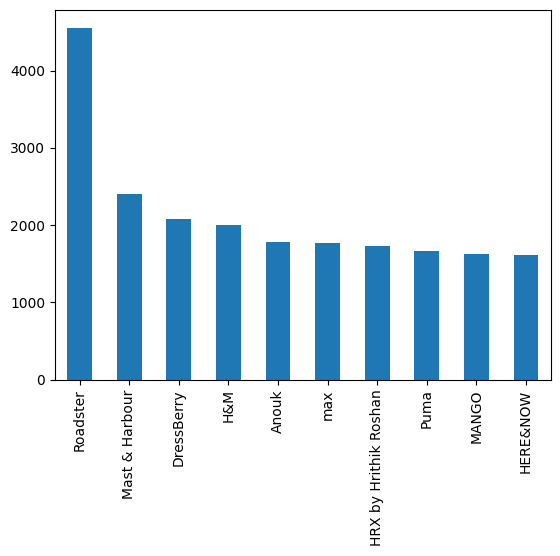

In [34]:
df["brand_name"].value_counts().head(10).plot(kind = "bar")

###  Find each brand average rating.

In [35]:
df_new = df
df_new["rating_prod"] = df_new["rating"]*df_new["rating_count"]
brand_rating=df_new.groupby("brand_name")["rating_prod","rating_count"].sum().reset_index()

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\1403575728.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_rating=df_new.groupby("brand_name")["rating_prod","rating_count"].sum().reset_index()


In [36]:
brand_rating["average_rating"]=brand_rating["rating_prod"]/brand_rating["rating_count"]

In [37]:
brand_rating = brand_rating.drop("rating_prod", axis =1)

In [38]:
brand_rating

,brand_name,rating_count,average_rating
0,1 Stop Fashion,2,5.000000
1,1st Step,0,NaN
2,20Dresses,14068,4.429642
3,39 THREADS,7,3.900000
4,3PIN,6,4.200000
...,...,...,...
3189,x2o,3879,4.073911
3190,yelloe,4098,4.190727
3191,yoho,0,NaN
3192,zebu,1579,4.437935


In [39]:
brand_rating["average_rating"].isnull().sum()

823

In [40]:
brand_rating.dropna(subset = ["average_rating"], inplace = True)

### Popular brand

In [41]:
brand_rating.sort_values(["rating_count","average_rating"], ascending = False)

,brand_name,rating_count,average_rating
2252,Roadster,2016518,4.114648
357,Biotique,725218,4.383002
1757,Maybelline,657744,4.421711
2296,SASSAFRAS,590550,4.285326
1082,HIGHLANDER,519108,4.078146
...,...,...,...
1222,Indian Dobby,2,1.000000
1686,MONJOLIKA FASHION,1,5.000000
1383,KULTPRIT,1,4.000000
2575,Swtantra,1,3.000000


From this we can conclude, Roadster is the most selling brand.

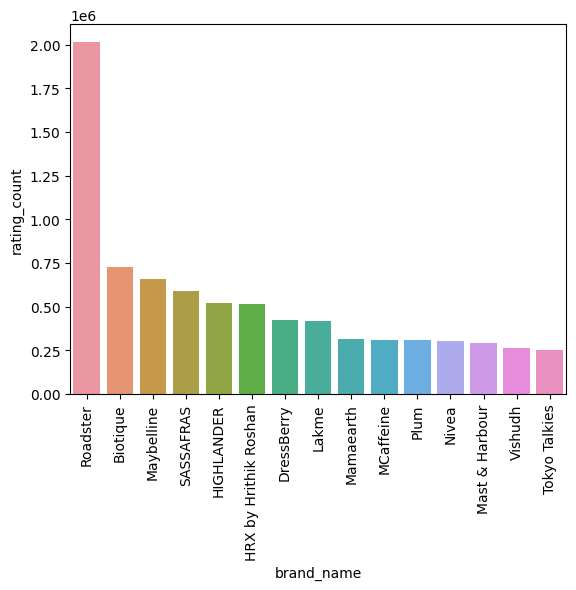

In [42]:
sns.barplot(data = brand_rating.sort_values(["rating_count","average_rating"], ascending = False).head(15), x = "brand_name", y = "rating_count")
plt.xticks(rotation =90)
plt.show()

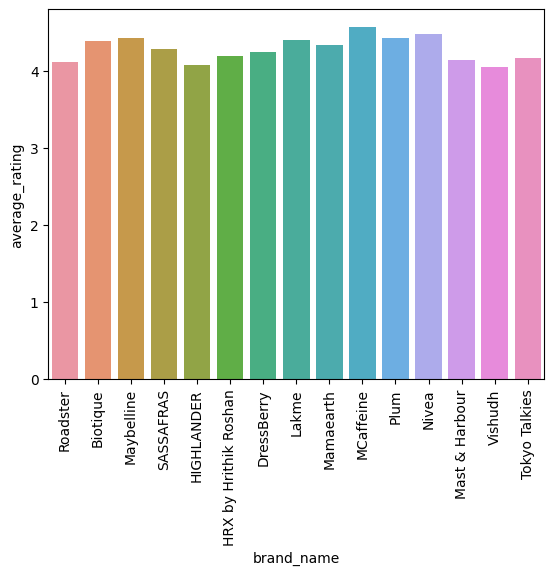

In [43]:
sns.barplot(data = brand_rating.sort_values(["rating_count","average_rating"], ascending = False).head(15), x = "brand_name", y = "average_rating")
plt.xticks(rotation =90)
plt.show()

### How many brands have average rating greater than 4 or 4.5?

<AxesSubplot: ylabel='average_rating'>

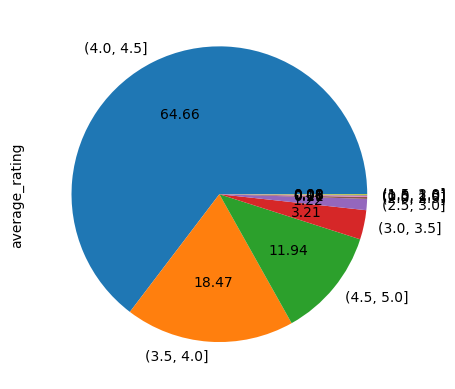

In [44]:
bins = (0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5)
brand_rating["average_rating"].value_counts(bins = bins).plot(kind = "pie", autopct = "%.2f")

76% of brands have average rating greater than 4.

In [45]:
brand_rating[brand_rating["average_rating"]<2]

,brand_name,rating_count,average_rating
1222,Indian Dobby,2,1.0
1385,Kaifoo,2,1.5
2243,Rex Straut Jeans,4,1.8
2402,SWISS BRAND,1,1.0
2480,Skidlers,5,1.4
2992,ZALORA BASICS,4,1.8
2998,ZEBRONICS,3,1.0


These are the brands which have rating less than 2 and we can see that they have very less rating_count so not many people bought products from these brands.

In [46]:
df["brand_name"].value_counts()

Roadster          4557
Mast & Harbour    2397
DressBerry        2073
H&M               1998
Anouk             1784
                  ... 
Plume                1
ALC Creations        1
FLUID                1
Astaberry            1
LIL PITAARA          1
Name: brand_name, Length: 3194, dtype: int64

In [47]:
df[df["rating_count"]==0.0]["brand_name"].value_counts()

max                        1054
H&M                        1000
MANGO                       930
URBANIC                     862
Roadster                    862
                           ... 
YNB YOURS NATURAL BUDDY       1
FIXDERMA                      1
MARK HOME                     1
FROGGY                        1
LIL PITAARA                   1
Name: brand_name, Length: 2615, dtype: int64

In [48]:
len(df[df["brand_name"]=="max"])

1772

We can conclude, Max is the brand which has maximum number of products which does not have any rating. That means max have maximum non-selling products.

### FInd the brand market size

In [49]:
df_new = df
df_new["sales_value"] = df_new["discounted_price"]*df_new["rating_count"]
brand_marketsize=df_new.groupby("brand_name")["sales_value","rating_count"].sum().reset_index()

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\1022795663.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_marketsize=df_new.groupby("brand_name")["sales_value","rating_count"].sum().reset_index()


In [50]:
brand_marketsize.sort_values("sales_value", ascending = False)

,brand_name,sales_value,rating_count
2252,Roadster,1352913126,2016518
1102,HRX by Hrithik Roshan,474101059,514356
2296,SASSAFRAS,432993884,590550
2090,Philips,361430218,158311
1082,HIGHLANDER,332229103,519108
...,...,...,...
1586,Love More,0,0
1574,Looney Tunes by Dressberry,0,0
1571,Lomani,0,0
1565,Little County,0,0


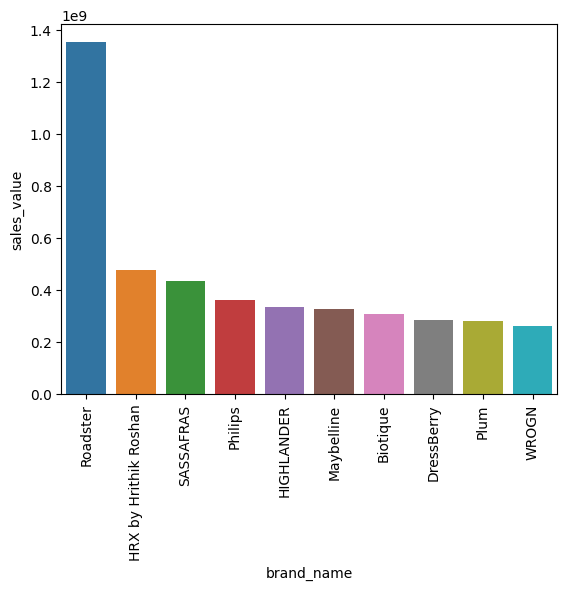

In [51]:
sns.barplot(data = brand_marketsize.sort_values("sales_value", ascending = False).head(10), x= "brand_name", y = "sales_value")
plt.xticks(rotation = 90)
plt.show()

Further questions which we can work on

(i) Which brands give maximum discount?


### Relationship between sales value and discount_percent for brands

In [52]:
df_new = df
df_new["sales_value"] = df_new["discounted_price"]*df_new["rating_count"]
brand_discounts_sales = df_new.groupby("brand_name").agg({'discount_percent': 'mean', 'sales_value': 'sum'}).reset_index()

In [53]:
brand_discounts_sales

,brand_name,discount_percent,sales_value
0,1 Stop Fashion,75.000000,2668
1,1st Step,10.000000,0
2,20Dresses,26.138952,17429259
3,39 THREADS,40.000000,4193
4,3PIN,43.000000,2046
...,...,...,...
3189,x2o,72.111111,3508790
3190,yelloe,57.478261,3808153
3191,yoho,28.857143,0
3192,zebu,59.312500,749545


<AxesSubplot: xlabel='discount_percent', ylabel='sales_value'>

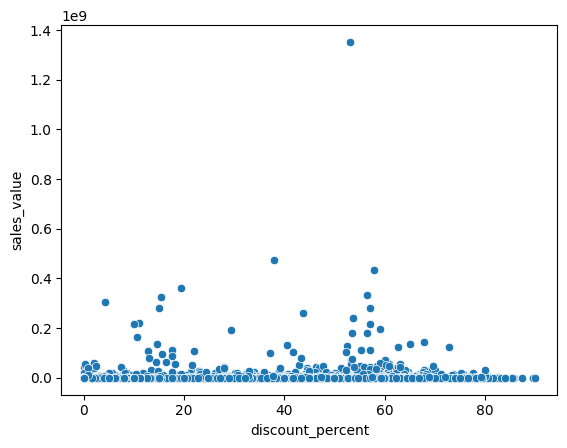

In [54]:
sns.scatterplot(data = brand_discounts_sales, x="discount_percent" , y= "sales_value")

Increase in discount percent in brand does not imply increase in sales value.

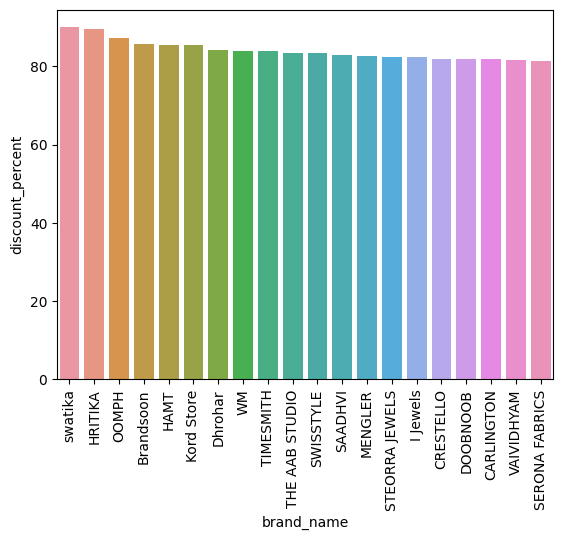

In [55]:
sns.barplot(data = brand_discounts_sales.sort_values("discount_percent", ascending = False).head(20), x="brand_name" , y= "discount_percent")
plt.xticks(rotation = 90)
plt.show()

# Analysis for product

In [56]:
prod_name = input()
df_new2 = df[df['product_name'].str.contains(prod_name, case = False)]
max_price = df_new2[df_new2["discounted_price"] == df_new2["discounted_price"].max()]
min_price = df_new2[df_new2["discounted_price"] == df_new2["discounted_price"].min()]
max_rating = df_new2[df_new2["rating"] == df_new2["rating"].max()]
print("Details of product " + prod_name + " having maximum price")
display(max_price)
print("Details of product " + prod_name + " having minimum price")
display(min_price)
print(" Maximum rating product " + prod_name + " details")
display(max_rating)

kurta
Details of product kurta having maximum price


,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag,rating_prod,sales_value
118913,16197620,Kurta with Skirt & Dupatta,Neerus,0.0,0,15590,14031,1559,10,M,kurta-sets,0.0,0


Details of product kurta having minimum price


,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag,rating_prod,sales_value
106998,11518656,Women Printed Straight Kurta,Wabii,0.0,0,1199,299,900,75,"S,M,L,XL,XXL",kurtas,0.0,0


 Maximum rating product kurta details


,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag,rating_prod,sales_value
3482,17030212,Kurta with Trousers & Dupatta,Biba,5.0,5,3999,2399,1600,40,"S,M,L,XL,XXL",kurta-sets,25.0,11995
4177,17486862,Women Printed Kurta with Palazzos With Dupatta,Indo Era,5.0,5,4999,2549,2450,49,"S,M,L,XL,XXL",kurta-sets,25.0,12745
4285,17889644,Women Chanderi Silk Kurta,EXTRA LOVE BY LIBAS,5.0,7,2199,1099,1100,50,"3XL,4XL,5XL,6XL",kurtas,35.0,7693
5560,17627700,Women Ethnic Motifs Printed Kurta,GERUA,5.0,4,1399,685,714,51,"XS,S,M,L,XL,XXL",kurtas,20.0,2740
5735,17502334,Women Ethnic Motifs Printed Anarkali Kurta,Juniper,5.0,5,2999,1589,1410,47,"S,M,L,XL",kurtas,25.0,7945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143371,17090494,Women Solid Kurta,Anouk,5.0,2,2499,1249,1250,50,"XS,S,M,L,XL,XXL",kurtas,10.0,2498
143472,17346372,Women Embroidered Kurta,SHINOY,5.0,3,2499,624,1875,75,"S,M,L,XL,XXL",kurtas,15.0,1872
143864,17629370,Women Ethnic Motifs Printed Anarkali Kurta,Maishi,5.0,3,2289,572,1717,75,"S,M,L,XL,XXL",kurtas,15.0,1716
144911,15612348,Women Ethnic Motifs Yoke Design Kurta,Rangriti,5.0,4,2199,2199,0,0,"4XL,6XL",kurtas,20.0,8796


### Product market size, average rating and discount percent

In [57]:
df_new = df
df_new["sales_value"] = df_new["discounted_price"]*df_new["rating_count"]
df_new["rating_prod"] = df_new["rating"]*df_new["rating_count"]
product_discounts_sales = df_new.groupby("product_tag").agg({'discount_percent': 'mean', 'sales_value': 'sum', "rating_prod":"sum", "rating_count":"sum"}).reset_index()

In [58]:
product_discounts_sales["average_rating"] = product_discounts_sales["rating_prod"]/product_discounts_sales["rating_count"] 
product_discounts_sales = product_discounts_sales.drop("rating_prod", axis = 1)

In [59]:
product_discounts_sales 

,product_tag,discount_percent,sales_value,rating_count,average_rating
0,accessory-gift-set,46.987500,4744567,3690,4.408672
1,action-figures-and-play-set,15.500000,5319,9,3.600000
2,activity-toys-and-games,54.750000,300243,357,3.935014
3,air-fryer,36.000000,0,0,NaN
4,anklet,61.295455,2451395,5493,4.267431
...,...,...,...,...,...
336,watches,33.308071,664690725,339656,4.283034
337,water-bottle,21.035294,1143421,1414,4.452122
338,windchimes,53.666667,7485,15,4.600000
339,wristbands,45.000000,15360,40,4.400000


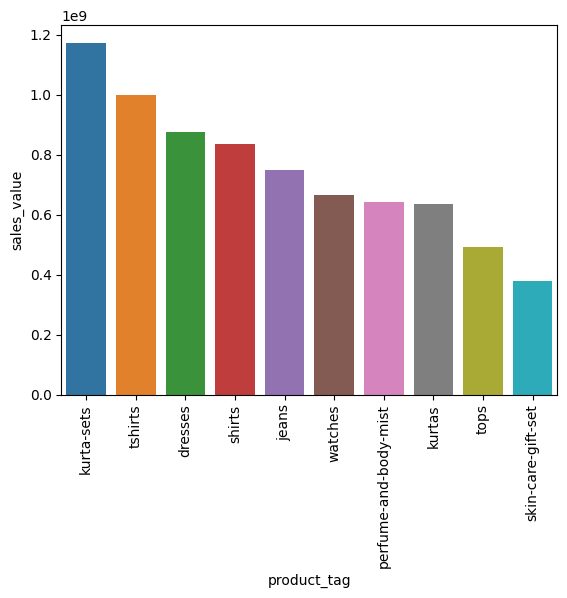

In [60]:
sns.barplot(data = product_discounts_sales.sort_values("sales_value", ascending = False).head(10), x = "product_tag", y = "sales_value" )
plt.xticks(rotation = 90)
plt.show()

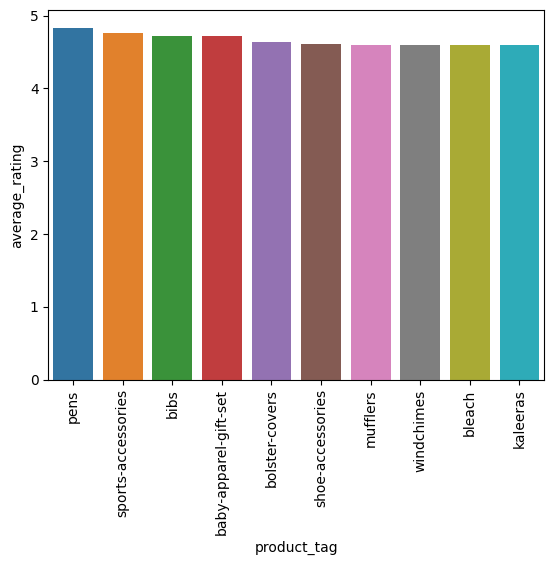

In [61]:
sns.barplot(data = product_discounts_sales.sort_values("average_rating", ascending = False).head(10), x = "product_tag", y = "average_rating" )
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: xlabel='average_rating', ylabel='sales_value'>

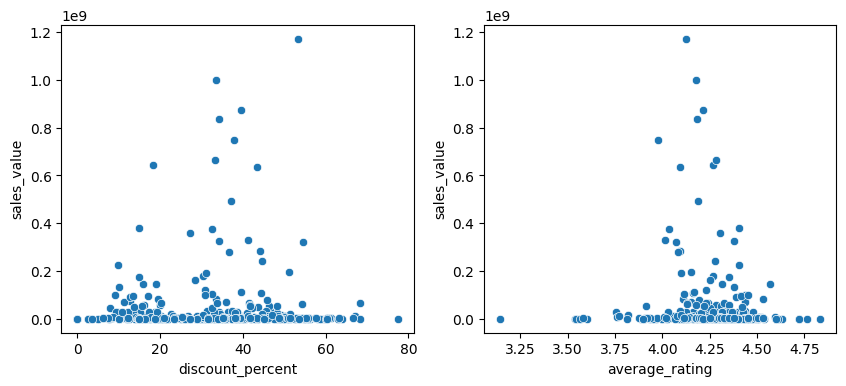

In [62]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.scatterplot(data = product_discounts_sales, x="discount_percent" , y= "sales_value")
plt.subplot(1,2,2)
sns.scatterplot(data = product_discounts_sales, x="average_rating" , y= "sales_value")

### How does the average discount percent vary across different product tags?

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\1116375924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(product_discounts_sales["discount_percent"] )


<AxesSubplot: xlabel='discount_percent', ylabel='Density'>

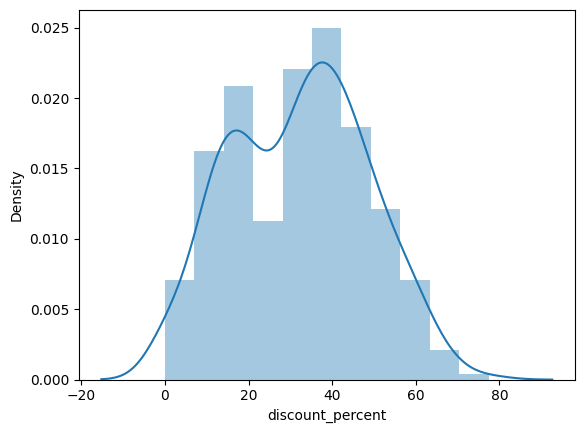

In [63]:
sns.distplot(product_discounts_sales["discount_percent"] )

### Are there any correlations between the rating, discount percent, and sales value of the products?

In [64]:
product_discounts_sales.corr() 

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\1818167198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  product_discounts_sales.corr()


,discount_percent,sales_value,rating_count,average_rating
discount_percent,1.000000,0.038687,-0.015342,-0.261146
sales_value,0.038687,1.000000,0.911296,-0.070674
rating_count,-0.015342,0.911296,1.000000,-0.036192
average_rating,-0.261146,-0.070674,-0.036192,1.000000


C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\1198286460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(product_discounts_sales.corr(), cmap = "coolwarm" )


<AxesSubplot: >

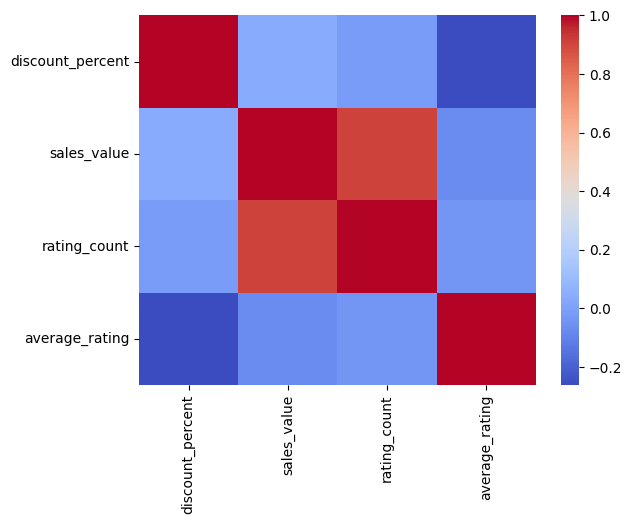

In [65]:
sns.heatmap(product_discounts_sales.corr(), cmap = "coolwarm" )

### Which brand has the highest average rating among different products?

In [88]:
df.head(2)

,Product_id,product_name,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,sizes,product_tag,rating_prod,sales_value
0,18070682,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,467,36,Onesize,wallets,0.0,0
1,12548958,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,715,55,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops,304.0,44384


In [89]:
df_prod_brand = df.groupby(["product_tag", "brand_name"]).sum()

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\1090884151.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prod_brand = df.groupby(["product_tag", "brand_name"]).sum()


In [90]:
df_prod_brand["avg_rating"] = df_prod_brand["rating_prod"]/df_prod_brand["rating_count"]

In [92]:
df_prod_brand = df_prod_brand.reset_index()

In [93]:
df_prod_brand

,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,rating_prod,sales_value,avg_rating
0,accessory-gift-set,Allen Solly,0.0,0,16993,13423,3570,147,0.0,0,NaN
1,accessory-gift-set,Blacksmith,7.8,167,18597,4847,13750,209,681.9,307113,4.083234
2,accessory-gift-set,COSA NOSTRAA,0.0,0,7898,5923,1975,50,0.0,0,NaN
3,accessory-gift-set,CRUSSET,9.4,36,4298,1116,3182,148,169.2,20088,4.700000
4,accessory-gift-set,Calvadoss,11.0,23,13194,3847,9347,347,85.4,17419,3.713043
...,...,...,...,...,...,...,...,...,...,...,...
12213,yoga-mats,LUXEHOME INTERNATIONAL,0.0,0,799,799,0,0,0.0,0,NaN
12214,yoga-mats,Man Matters,4.8,10,699,503,196,28,48.0,5030,4.800000
12215,yoga-mats,NYAMBA By Decathlon,4.1,46,1499,1499,0,0,188.6,68954,4.100000
12216,yoga-mats,Puma,7.5,285,3998,2498,1500,80,1278.0,216465,4.484211


In [94]:
df_prod_brand["product_tag"].unique()

array(['accessory-gift-set', 'action-figures-and-play-set',
       'activity-toys-and-games', 'air-fryer', 'anklet',
       'appliance-covers', 'aprons', 'aroma-oil-diffusers',
       'artificial-flowers-and-plants', 'baby-apparel-gift-set',
       'baby-bed-sets', 'baby-care-products', 'baby-dolls',
       'baby-gear--nursery', 'baby-photoshoot-props', 'baby-utensils',
       'backpacks', 'badminton-racquets', 'bakeware', 'bangle',
       'bar-accessories', 'bar-and-drinkware', 'basketballs',
       'bath-accessories', 'bath-and-body-gift-set', 'bath-robe',
       'bath-rugs', 'bath-soak-salt-and-oil', 'bath-towels',
       'bathroom-accessories', 'bb-and-cc-cream', 'bean-bag-cover',
       'beard--moustache-care', 'beauty-accessory', 'beauty-gift-set',
       'bed-covers', 'bedding-set', 'bedsheets', 'belts', 'bibs', 'bins',
       'blankets-quilts-and-dohars', 'blazers', 'bleach', 'body-lotion',
       'body-oil', 'body-wash-and-scrub', 'body-wax-and-essentials',
       'bodysuit', 

In [114]:
df_prod_brand[df_prod_brand["product_tag"]=="shirts"][["brand_name","avg_rating"]].sort_values("avg_rating", ascending = False).head(20)

,brand_name,avg_rating
8367,Luxure by Louis Philippe,5.000000
8332,JBN Creation,5.000000
8450,SHIRT THEORY,5.000000
8306,HOUSE OF KKARMA,5.000000
8528,YOVISH,4.820000
8533,Zeal,4.800000
8238,CAVIO,4.760000
8204,Allen Solly Junior,4.734375
8291,Fbella,4.714286
8398,Nauti Nati,4.700000


In [78]:
df_prod_brand_highest = df_prod_brand.groupby("product_tag")["brand_name","avg_rating"].max().reset_index()

C:\Users\GFG19189\AppData\Local\Temp\ipykernel_11944\2229456876.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prod_brand_highest = df_prod_brand.groupby("product_tag")["brand_name","avg_rating"].max().reset_index()


In [82]:
df_prod_brand_highest

,product_tag,brand_name,avg_rating
0,accessory-gift-set,ZEVORA,4.794776
1,action-figures-and-play-set,Wembley Toys,3.600000
2,activity-toys-and-games,Wembley Toys,4.300000
3,air-fryer,Wonderchef,NaN
4,anklet,Zavya,4.500000
...,...,...,...
336,watches,ZINVO,4.870588
337,water-bottle,iSWEVEN,4.622115
338,windchimes,DULI,4.600000
339,wristbands,Puma,4.400000


In [86]:
df_prod_brand_highest[df_prod_brand_highest['product_tag'].str.contains("shirt", case = False)]

,product_tag,brand_name,avg_rating
193,lounge-tshirts,max,5.0
259,shirts,wild U,5.0
290,sweatshirts,zink Z,5.0
322,tshirts,zink Z,5.0
